<a href="https://colab.research.google.com/github/IT21004186/DS-A-Lab03/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_data = pd.read_csv("loan.csv")

In [3]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data.shape

(20000, 142)

In [5]:
raw_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv            int64
                          ...   
settlement_status        float64
settlement_date          float64
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 142, dtype: object

In [6]:
raw_data['loan_amnt'].describe()

count    20000.000000
mean     16111.383750
std      10369.193761
min       1000.000000
25%       8000.000000
50%      14000.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [7]:
columns_to_remove = ['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d',
                     'verification_status', 'pymnt_plan', 'funded_amnt_inv', 'sub_grade',
                     'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt',
                     'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                     'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
                     'last_pymnt_amnt', 'initial_list_status']

raw_data = raw_data.drop(columns=columns_to_remove, axis=1)

In [8]:
col_num = 0
TotalObjects = raw_data.shape[0]
print("Column\t\t\t\t\t Null Values%")
for x in raw_data:
    nullCount = raw_data[x].isnull().sum()
    nullPercent = nullCount * 100 / TotalObjects
    if nullCount > 0 and nullPercent > 20:
        col_num = col_num + 1
        raw_data.drop(x, axis=1, inplace=True)
        print(str(x) + "\t\t\t\t\t" + str(nullPercent))
print("A total of " + str(col_num) + " columns deleted!")

Column					 Null Values%
id					100.0
member_id					100.0
url					100.0
desc					100.0
mths_since_last_delinq					56.375
mths_since_last_record					88.41
mths_since_last_major_derog					77.47
annual_inc_joint					87.845
dti_joint					87.845
verification_status_joint					89.17
mths_since_recent_bc_dlq					80.36
mths_since_recent_revol_delinq					71.3
revol_bal_joint					87.845
sec_app_earliest_cr_line					87.845
sec_app_inq_last_6mths					87.845
sec_app_mort_acc					87.845
sec_app_open_acc					87.845
sec_app_revol_util					88.0
sec_app_open_act_il					87.845
sec_app_num_rev_accts					87.845
sec_app_chargeoff_within_12_mths					87.845
sec_app_collections_12_mths_ex_med					87.845
sec_app_mths_since_last_major_derog					96.295
hardship_type					100.0
hardship_reason					100.0
hardship_status					100.0
deferral_term					100.0
hardship_amount					100.0
hardship_start_date					100.0
hardship_end_date					100.0
payment_plan_start_date					100.0
hardship_length					100.0
hardship_dpd					100.0

In [9]:
remaining_missing_cols = raw_data.columns[raw_data.isnull().any()].tolist()
print("Remaining columns with missing data:")
print(remaining_missing_cols)

Remaining columns with missing data:
['emp_title', 'emp_length', 'dti', 'revol_util', 'next_pymnt_d', 'mths_since_rcnt_il', 'all_util', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'num_tl_120dpd_2m', 'percent_bc_gt_75']


In [10]:
raw_data['next_pymnt_d'].fillna('Completed', inplace=True)

In [11]:
columns_to_fill_with_zero = ['mths_since_rcnt_il', 'mo_sin_old_il_acct', 'bc_open_to_buy',
                             'num_tl_120dpd_2m', 'bc_util', 'percent_bc_gt_75']
raw_data[columns_to_fill_with_zero] = raw_data[columns_to_fill_with_zero].fillna(0)

In [12]:
columns_to_fill_with_mean = ['all_util', 'avg_cur_bal']
raw_data[columns_to_fill_with_mean] = raw_data[columns_to_fill_with_mean].fillna(raw_data[columns_to_fill_with_mean].mean())

In [13]:
print("Data shape after cleaning:", raw_data.shape)
print("First few rows of cleaned data:")
print(raw_data.head())

Data shape after cleaning: (20000, 79)
First few rows of cleaned data:
   loan_amnt  funded_amnt        term  int_rate  installment grade  \
0       2500         2500   36 months     13.56        84.92     C   
1      30000        30000   60 months     18.94       777.23     D   
2       5000         5000   36 months     17.97       180.69     D   
3       4000         4000   36 months     18.94       146.51     D   
4      30000        30000   60 months     16.14       731.78     C   

        emp_title emp_length home_ownership  annual_inc  ... percent_bc_gt_75  \
0            Chef  10+ years           RENT     55000.0  ...              0.0   
1     Postmaster   10+ years       MORTGAGE     90000.0  ...              0.0   
2  Administrative    6 years       MORTGAGE     59280.0  ...              0.0   
3   IT Supervisor  10+ years       MORTGAGE     92000.0  ...            100.0   
4        Mechanic  10+ years       MORTGAGE     57250.0  ...              0.0   

  pub_rec_bankruptcie

In [14]:
raw_data['emp_length'].fillna(0, inplace=True)

In [15]:
def CalculateEmployeeLength(year):
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years':
        return 10
    else:
        yr = str(year)
        return float(yr.rstrip(' years'))

In [16]:
raw_data['emp_length'] = raw_data['emp_length'].apply(CalculateEmployeeLength)

In [17]:
def CalculateLoanRanges(value):
    if value <= 5000:
        return '5K and Below'
    elif value <= 10000:
        return '5K-10K'
    elif value <= 15000:
        return '10K-15K'
    elif value <= 20000:
        return '15K-20K'
    elif value <= 25000:
        return '20K-25K'
    elif value <= 30000:
        return '25K-30K'
    else:
        return '30K and Above'
def CalculateLoanRanges(value):
    if value <= 5000:
        return '5K and Below'
    elif value <= 10000:
        return '5K-10K'
    elif value <= 15000:
        return '10K-15K'
    elif value <= 20000:
        return '15K-20K'
    elif value <= 25000:
        return '20K-25K'
    elif value <= 30000:
        return '25K-30K'
    else:
        return '30K and Above'

In [18]:
loan_ranges = raw_data['loan_amnt'].apply(CalculateLoanRanges)

In [19]:
loan_range_counts = loan_ranges.value_counts()

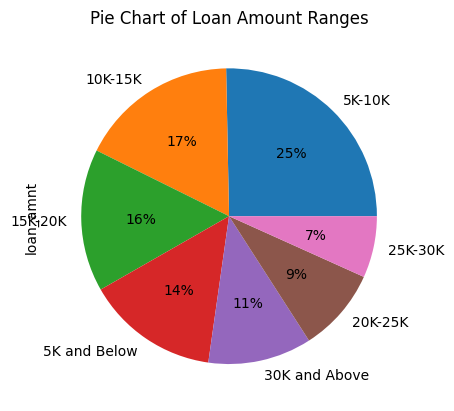

In [20]:
plt.figure()
loan_range_counts.plot.pie(autopct='%1.0f%%')
plt.title('Pie Chart of Loan Amount Ranges')
plt.show()

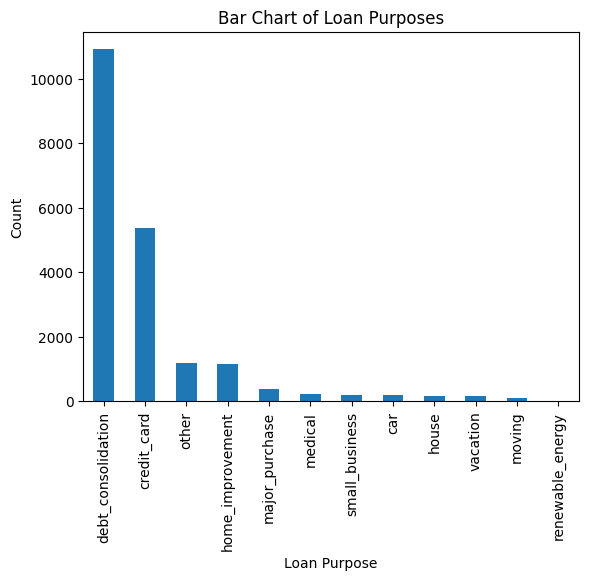

In [21]:
purposes = raw_data['purpose'].value_counts()
purposes.plot(kind='bar')
plt.title('Bar Chart of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [22]:
raw_data.to_csv('cleaned_loans2007.csv', index=False, encoding='utf-8')